<a href="https://colab.research.google.com/github/Sammy-Mutua/DSC_14B_IP_WEEK7/blob/main/Copy_of_DSC14B_Samuel_Mutua_Independent_Project_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC14B MACHINE LEARNING INDEPENDENT PROJECT WEEK 7

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 



### b) Defining the Metric for Success

> Develop a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### c) Understanding the context 

> HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

> HassConsult has a wealth of experience in the real estate field and thus continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles. As a policy, HassConsult works towards new innovations and continually brings dynamism to the industry in Kenya - be it the launch of off-plan developments or the introduction of versatile financial structures for property developments, which have propelled the industry into new directions.



### d) Recording the Experimental Design

> I.Define the question, the metric for success, the context, experimental design taken.

>II. Read and explore the given dataset.

>III. Define the appropriateness of the available data to answer the given question.

>IV. Find and deal with outliers, anomalies, and missing data within the dataset.

>V. Perform univariate, bivariate and multivariate analysis recording your observations.

>VI. Performing regression analysis.

>VII. Incorporate categorical independent variables into your models.

>VIII. Check for multicollinearity

>IX. Provide a recommendation based on your analysis. 

>X. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

>XI. Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset.]

## 2. Reading the Data

In [61]:
# Importing the necessary Libraries
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
import requests
from io import StringIO
import datetime as dt
%matplotlib inline

In [3]:
house = pd.read_csv('house.csv')

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
# Previewing the top of our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# Checking whether each column has an appropriate datatype
#
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. Tidying the Dataset

In [41]:
# Dropping the unnecessary columns

house.drop(house.iloc[:, 13:20], inplace = True, axis = 1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400
2,180000,2,1,770,10000,1,0,0,3,6,770,0
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,0,3,8,1530,0
21609,400000,4,2,2310,5813,2,0,0,3,8,2310,0
21610,402101,2,0,1020,1350,2,0,0,3,7,1020,0
21611,400000,3,2,1600,2388,2,0,0,3,8,1600,0


In [42]:
# Checking for duplicates
#
house.duplicated().any()

True

In [43]:
# Dropping the duplicates
#
house.drop_duplicates(keep='first', inplace = True)

In [44]:
# checking if the duplicates have been removed
#
house.duplicated().any()

False

In [45]:
# Identifying the Missing Data
#
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
dtype: int64

In [ ]:
house = house.astype('int')


## 5. Exploratory Analysis

### a) Univariate Analysis

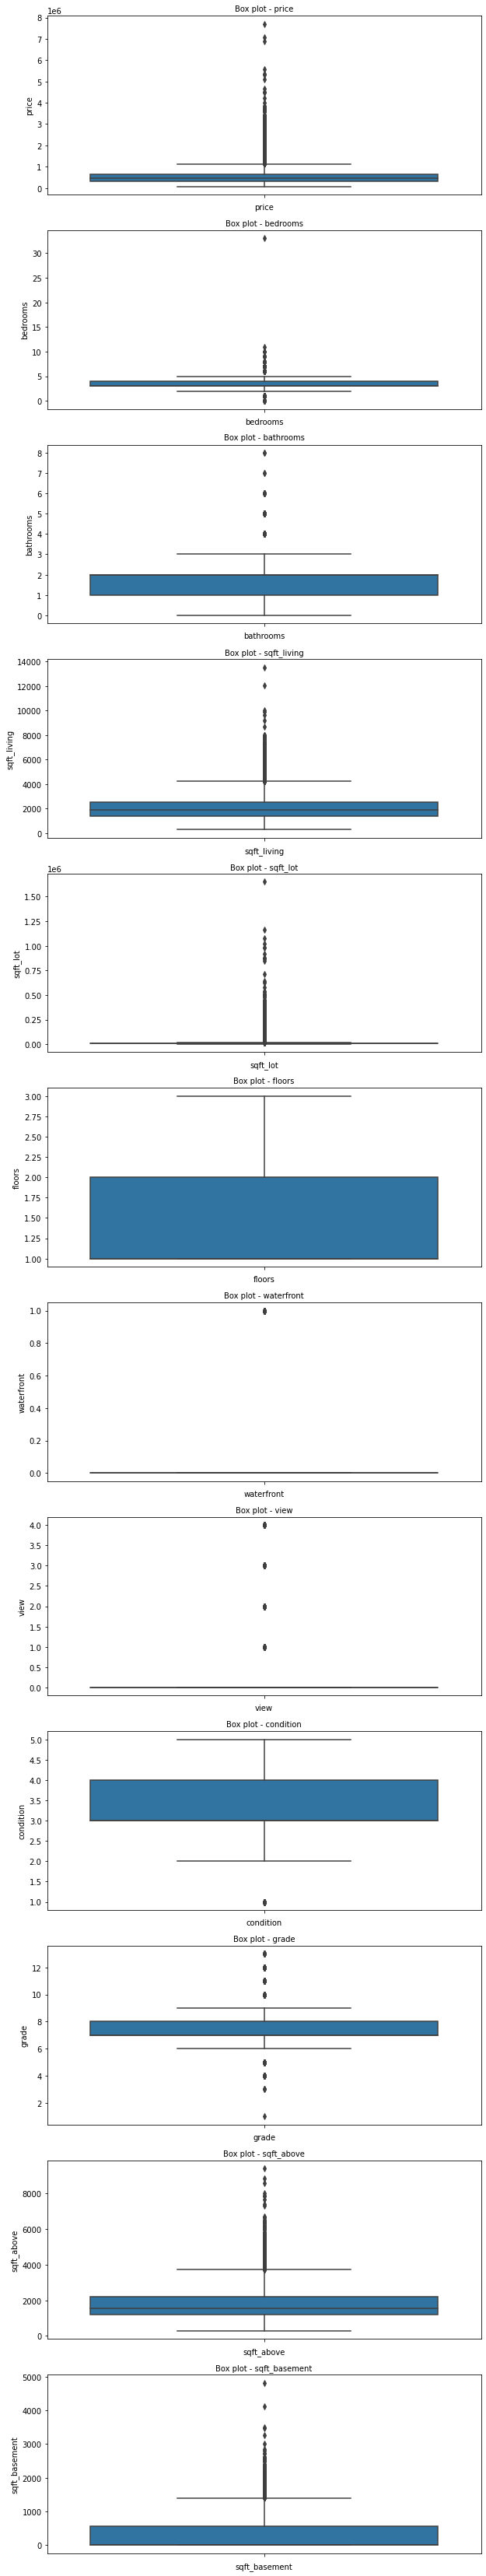

In [32]:
from IPython.core.pylabtools import figsize
# Checking for outliers.
columns_dict = {'price': 1, 'bedrooms': 2, 'bathrooms': 3, 'sqft_living': 4, 'sqft_lot': 5,
       'floors': 6, 'waterfront': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12}

fig,ax = plt.subplots(len(columns_dict) ,figsize = (10,60))
for i , col_val in enumerate(columns_dict):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

There are presence of outliers, but have decided to keep them since they are natural values

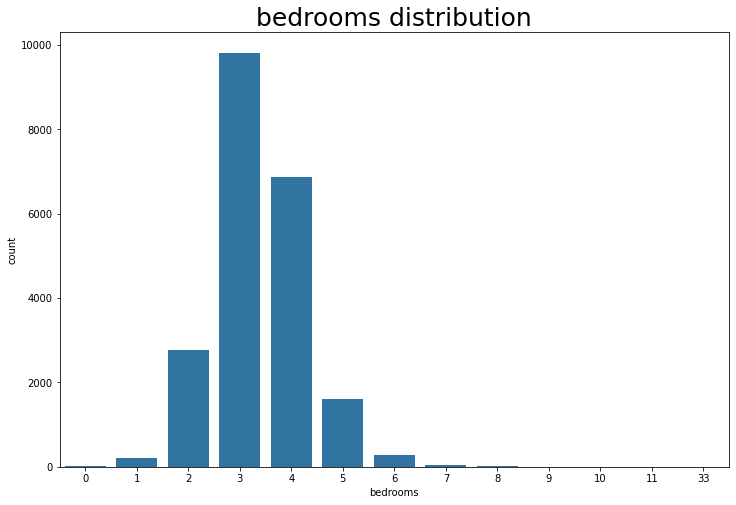

In [33]:
# Ploting the univariate summaries and recording our observations
# Bedroom distribution
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = house, x = 'bedrooms', color = base_color)

n_points = house.shape[0]
cat_counts = house['bedrooms'].value_counts()
locs, labels = plt.xticks() 
plt.title('bedrooms distribution',fontsize=25);

Most houses in our dataset have between two to five bedrooms
 

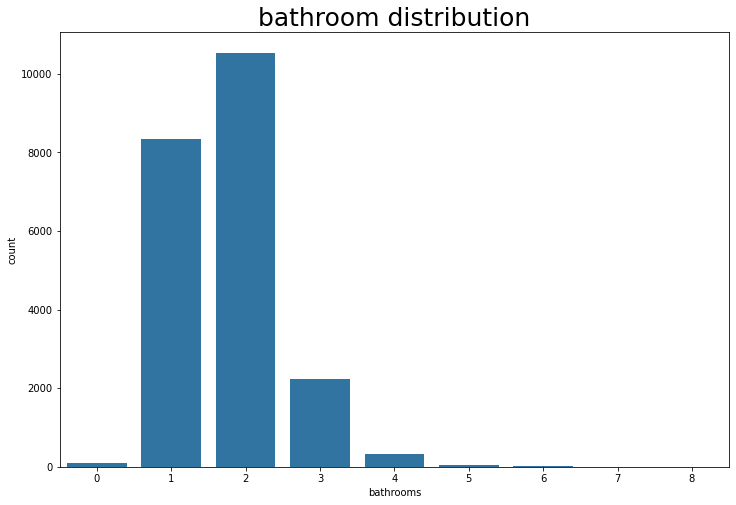

In [34]:
# Bathroom Distribution
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = house, x = 'bathrooms', color = base_color)

n_points = house.shape[0]
cat_counts = house['bathrooms'].value_counts()
locs, labels = plt.xticks() 
plt.title('bathroom distribution',fontsize=25);

Most of the houses have either one,two or three bathrooms

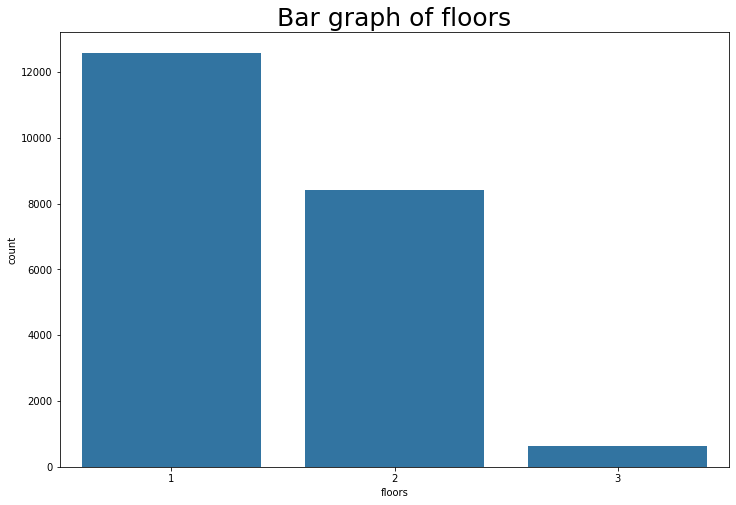

In [35]:
# Floor Distribution
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = house, x = 'floors', color = base_color)

# add annotations
n_points = house.shape[0]
cat_counts = house['floors'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of floors',fontsize=25);

Most houses have either one or two floors

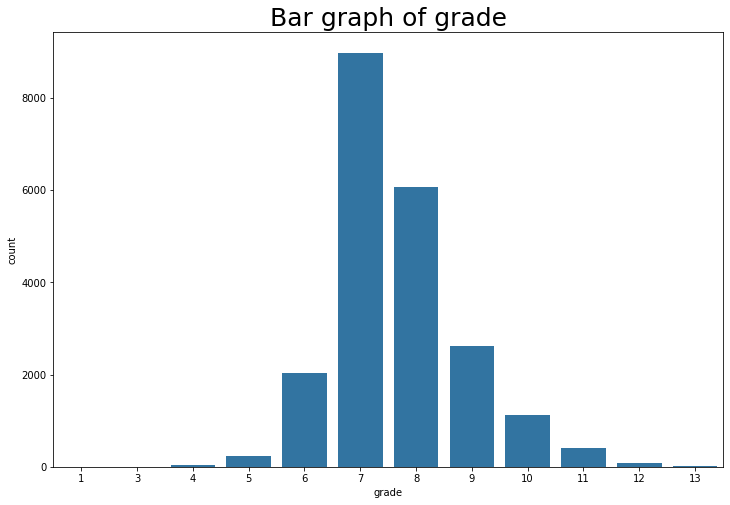

In [36]:
# Distribution of grade
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = house, x = 'grade', color = base_color)

# add annotations
n_points = house.shape[0]
cat_counts = house['grade'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of grade',fontsize=25);

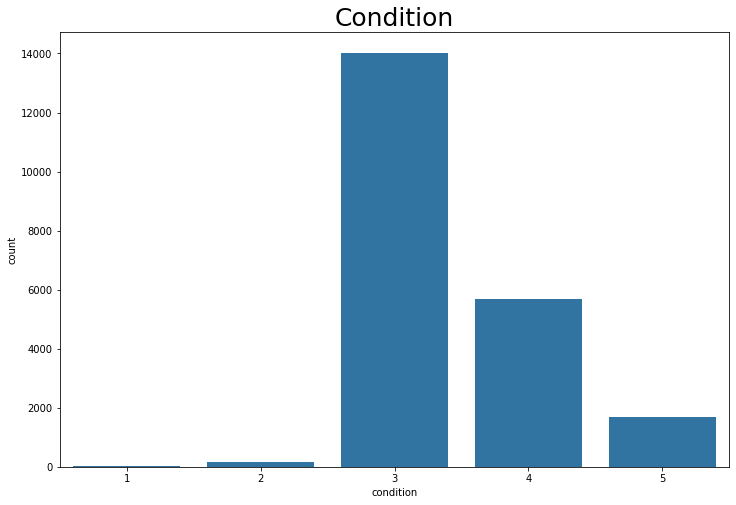

In [37]:
# Condition check
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = house, x = 'condition', color = base_color)

# add annotations
n_points = house.shape[0]
cat_counts = house['condition'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Condition',fontsize=25);

### b) Bivariate Analysis

Checking Multicolinearity

In [38]:
# Correlation Matrix
correlation = house.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443


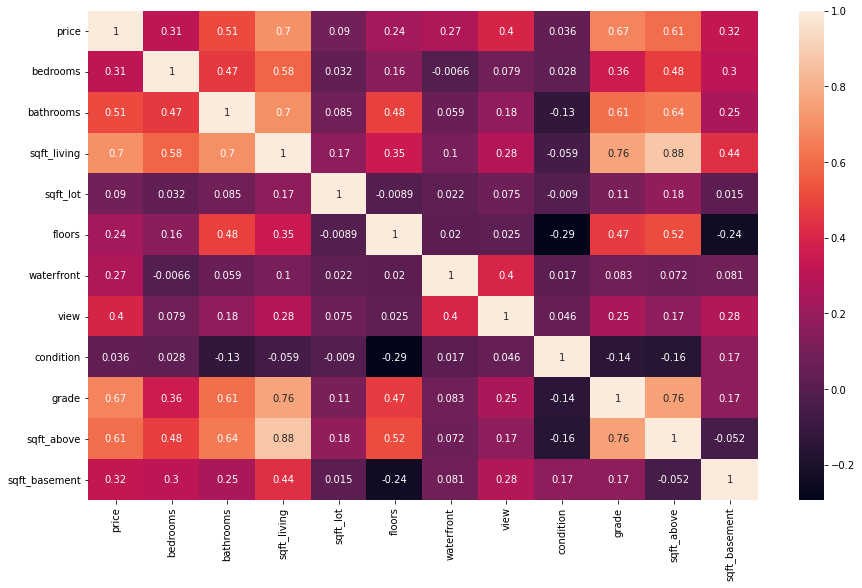

In [39]:
#Plottting a heatmap to show correlation of different numerical variables
plt.figure(figsize=(15,9))
sns.heatmap(house.corr(), xticklabels = house.corr().columns, yticklabels = house.corr().columns, annot=True);

>The price has a high Correlation with the following columns: square foot living, grade with the correlation above 0.5

>The grade has a high correlation with the number of bathrooms and bedrooms and the Square feet area of living area

>The number of floors and the number of bathrooms are highly correlated

>The number of bathrooms, the grade and the Square feet area of living area

Computing the Variance Inflation Factor(VIF) -
We create a new dataframe with the INVERSE of the correlations above.

In [40]:
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
price,2.550965,0.248357,-0.144178,-3.717522e+00,0.099777,0.167385,-0.350383,-0.323245,-0.230825,-0.845655,2.355598e+00,1.206441e+00
bedrooms,0.248357,1.634563,-0.301755,-9.130457e-02,0.119358,0.101780,0.028115,0.086546,-0.099643,0.214836,-9.341516e-01,-5.375578e-01
bathrooms,-0.144178,-0.301755,2.325997,-1.295000e+00,-0.007634,-0.685062,0.024709,0.027195,0.064615,-0.164907,3.576667e-01,-1.850000e-02
sqft_living,-3.750329,-0.104007,-1.277507,2.282924e+14,-0.123871,-0.518916,0.783804,-0.181244,0.173731,4.293820,-2.058331e+14,-1.100070e+14
sqft_lot,0.099777,0.119358,-0.007634,-1.208174e-01,1.065097,0.153474,0.002472,-0.056225,-0.000400,0.031889,-2.964008e-01,1.469353e-04
floors,0.167385,0.101780,-0.685062,-4.409543e-01,0.153474,1.838583,-0.035148,0.006671,0.240345,-0.471961,1.338586e-01,7.541283e-01
waterfront,-0.350383,0.028115,0.024709,7.814781e-01,0.002472,-0.035148,1.246047,-0.446462,0.025494,0.180866,-6.472144e-01,-2.945334e-01
view,-0.323245,0.086546,0.027195,-1.899255e-01,-0.056225,0.006671,-0.446462,1.397548,-0.012068,-0.106657,1.790168e-01,-1.658147e-01
condition,-0.230825,-0.099643,0.064615,1.747254e-01,-0.000400,0.240345,0.025494,-0.012068,1.137714,0.151473,-7.528833e-02,-1.571055e-01
grade,-0.845655,0.214836,-0.164907,4.230167e+00,0.031889,-0.471961,0.180866,-0.106657,0.151473,3.152132,-5.440499e+00,-2.527016e+00


1 = not correlated.   
   Between 1 and 5 = moderately correlated.   
Greater than 5 = highly correlated.

## 6. Implementing the Solution

### a) Linear Regression

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = house.drop(['price'],axis=1)
y = house['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4.321000e+03
mean,-3.533713e+02
std,2.324749e+05
min,-4.163918e+06
25%,-9.861161e+04
50%,1.493422e+04
75%,1.292150e+05
max,9.402295e+05


In [48]:
residuals.mean()

-353.37127771830325

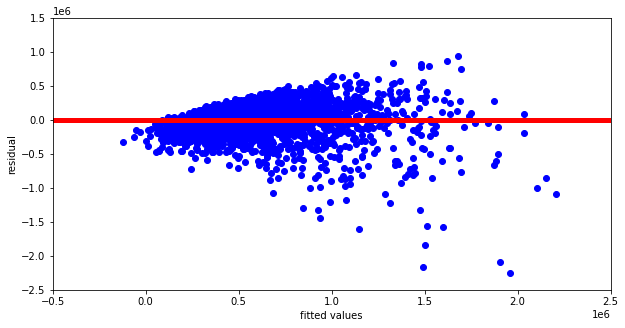

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.scatter(y_predict, residuals, color='blue')
plt.ylim(-2500000, 1500000)
plt.xlim(-500000, 2500000)
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

Barlett's test for Heteroskedasticity   
 -Null Hypothsis: The variance is equal for all our datapoints

-Alternative Hypothesis: The variance is different for at least one pair of datapoints.

In [50]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

1.3675804542569521e-46
The variances are homogeneous!


In [51]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 232448.26967540197
The R2 score for the linear model is: 0.596623088439999


### b) Quantile Regression 

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as pl

In [67]:
# Splitting our data into training and test sets
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement']].values
y = house['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3242
Model:                       QuantReg   Bandwidth:                   2.761e+04
Method:                 Least Squares   Sparsity:                    3.942e+05
Date:                Sun, 12 Jun 2022   No. Observations:                21604
Time:                        23:22:24   Df Residuals:                    21593
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.703e+05   1.48e+04    -11.477      0.000   -1.99e+05   -1.41e+05
X[0]       -5.317e+04   1829.862    -29.059      0.000   -5.68e+04   -4.96e+04
X[1]        2.109e+04   2778.711      7.591      0.000    1.56e+04    2.65e+04
X[2]         168.3269      3.131     53.759      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [68]:
# This is our prediction for price based on our model
import sklearn.metrics as metrics
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 242425.4845312319
The R2 score for the elastic model is: 0.5646618768465739


### c) Ridge Regression 

In [72]:
X = house.drop(['price'],axis=1)
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Splitting the dataset into training and testing sets
#
scaler = StandardScaler()
X = scaler.fit_transform(X)
# determining the most appropriate value for the l2 regularization.
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

{'alpha': 0.01}

In [73]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c);

Ridge model Root Mean Squared Error: 229165.33859908272
The R2 score for the ridge model is: 0.6034343308739141


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


### c) Lasso Regression 

In [75]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

X = house.drop(['price'],axis=1)
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_train, y_train) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6078245740666675
lasso MSE: 52943204080.31205
lasso coef: [-4.11872365e+04  2.49664618e+04  2.91602758e+02 -3.07255159e-01
 -4.09657112e+04  6.12735293e+05  6.07859833e+04  5.10986795e+04
  1.00568198e+05 -1.07244961e+02 -9.39146567e+01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.921e+14, tolerance: 2.201e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### c) Elastic Net Regression 

In [77]:
X = house.drop(['price'],axis=1)
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
scaler = StandardScaler()
search.fit(X_train,y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [78]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 229098.1410224639
The R2 score for the elastic model is: 0.6036668646863868


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


In [79]:
# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.596623
1         quantile   0.564662
2            ridge   0.603434
3            lasso   0.596661
4          elastic   0.603667
**************
The mean r2 scores is: r2_scores    0.59301
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
> yes

### b). Do we need other data to answer our question?
>Yes we do, to get more meaning of the variables

### c). Did we have the right question?
>Yes